<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/6_3_github_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B9%BC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

너무 많은 데이터로 인해 저장공간이 부족한 경우, 군집이나 분류에 영향을 끼치지 않으면서 데이터의 용량을 줄여보자

# 차원축소 (dimentionality reduction)

차원이란?

다차원배열과 1차원 배열에서 차원이란 용어는 조금 다르게 사용

다차원 배열에서 차원은 배열의 축 개수

1차원 배열에서 차원은 원소의 개수 -> 혼란을 피하기 위해 특성이라 하기로 하자

( 왜 1차원 배열만 차원이 원소의 개수임?? 걍 만든사람이 그렇게 정해놓은 거다 )


특성이 많으면?

장점: 선형 모델의 성능이 높아짐

단점1: 훈련데이터에 쉽게 과대적합됨

단점2: 데이터 용량이 급격히 증가하여 저장공간이 부족

단점3: 모델 처리속도가 떨어짐

----------

차원축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬수 있음

줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음

### 주성분 분석( PCA, principal component analysis)

대표적인 차원축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

분산은 데이터가 널리 퍼져있는 정도

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터( 데이터를 표현하는데 적합 )





위 데이터는 x1, x2 특성이 있으며 대각선 방향으로 길게 늘어진 형태임

화살표는 이 데이터에서 가장 분산이 큰 방향임

화살표의 위치는 데이터 이동이 가능하므로 아래와 같이 큰 의미가 없음


찾은 직선 (벡터)이 원점에서 출발하면 주성분이라부름

사이킷런의 PCA 모델은 특성마다 평균값을 빼서 원점에 자동으로 맞춤

-----------

현재 벡터가 하나이므로 주성분은 하나임

원래 특성은 2개이지만 하나의 주성분으로 데이터를 표현한다면 2개의 특성이 하나로 줄어들었기 때문에 차원이 축소되었다고 말할 수 있음







위 그림의 점 S(4,2)는 주성분 벡터에 직각이 되는 위치인 점 P(4,5)로 투영가능

즉, 4와 2라는 2개의 특성이 하나의 특성 4.5로 변환

주성분 벡터의 원소 개수는 원본 데이터 세트와 동일하나 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음( 물론 손실은 발생함 )

두번째 주성분도 찾을 수 있음

첫번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾을 수 있음

일반적으로 주성분은 이를 반복하여 주성분을 찾아냄

그러나 만약 주성분의 개수와 기존의 특성의 개수가 같다면 차원 축소 효과가 없으므로 주성분은 원본 특성 개수보다 적게 찾아서 사용

이전 절과 마찬가지로 과일 사진 데이터 다운로드

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-10-30 01:42:18--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:42:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:42:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

주성분 분석 알고리즘은 sklearn.decomposition 모듈 아래 PCA 클래스를 import 하여 사용할 수 있음

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


n_components: 주성분의 개수를 지정하는데 필수로 사용해야한는 매개변수

첫번째 차원은 50 즉, 50개의 주성분을 찾음

두번쨰 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000

주의할 점 : 주성분 벡터의 크기는 원본 데이터와 동일함

----------

--> 다시말해 10000개의 본래 특성( 차원 )을
50개의 주성분으로 줄이는 작업을 설정한 것임

그리고 그 과정은 다음과 같음

( 위의 그래프 2개 참고하면서 보셈 )

1. 10000개의 특성을 x,y,z...등등 축선으로 하여 그 위에 데이터의 분산을 표현

   ( 각각의 원소가 축선이 되는 이러한 특징 때문에 1차원 배열의 원소의 개수를 해당 배열의 차원이라고 하는 거임 )

2. 그 분산을 가장 잘 나타내는 벡터를 찾아 주성분으로 삼음

3.  그 주성분에 수직인 선을 바탕으로 주성분을 찾음

4. 반복하여 50개까지 주성분을 찾음

대략 이런느낌 --> 위쪽에 주성분 관련 설명 보면서 보면 이해될듯??

주성분을 이미지처럼 출력해보자

이전 절에서 만든 draw_fruits()

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

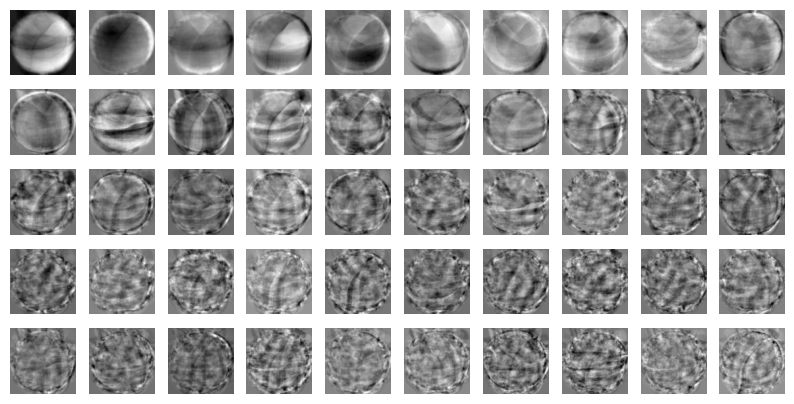

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄



In [ ]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


10000개의 특성이 주성분 50개로 줄어들었음

## 원본 데이터 재구성

위에서 주성분으로 줄였던 데이터는 다시 원본 데이터로 돌리고 싶다면 다음과 같이 하면됨

하지만 이 경우 압축시킨다음 그 데이터를 바탕으로 복구시킨 것이기 때문에 손실이 발생할수밖에 없음

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


아래 그림을 보면 살짝 손실되어 있음

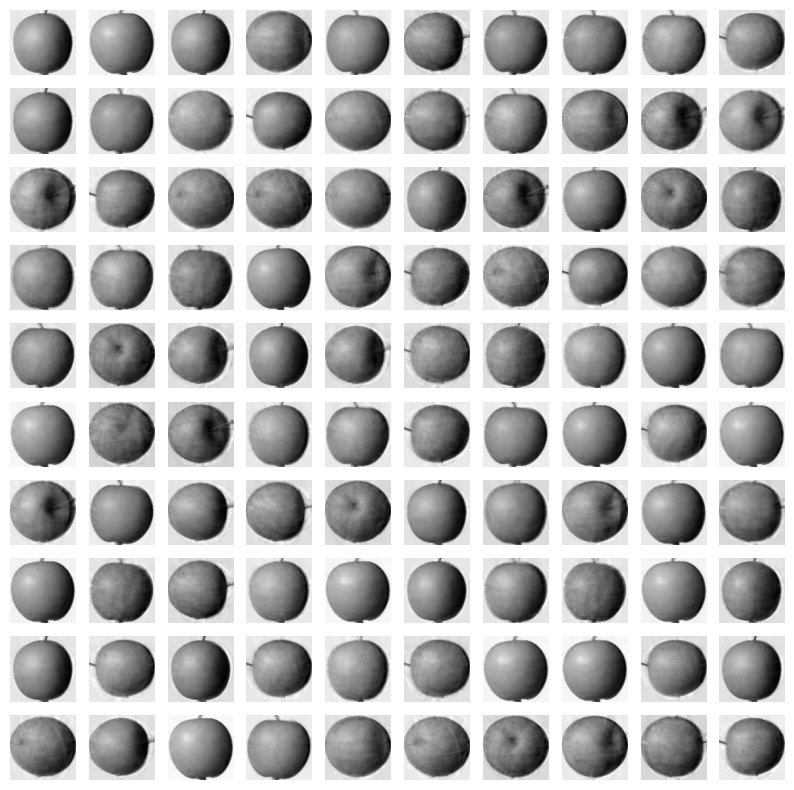

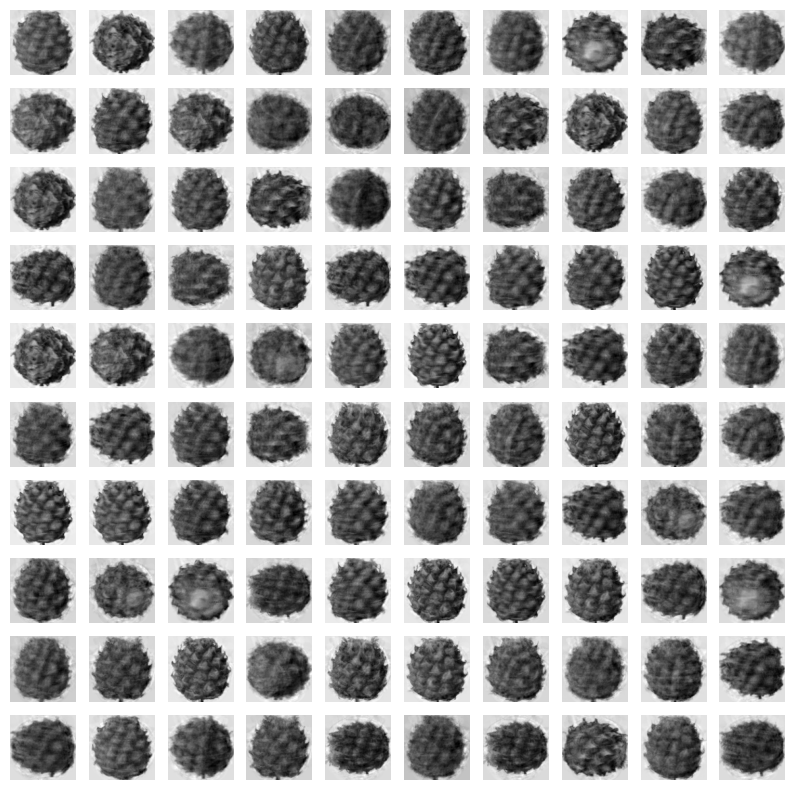

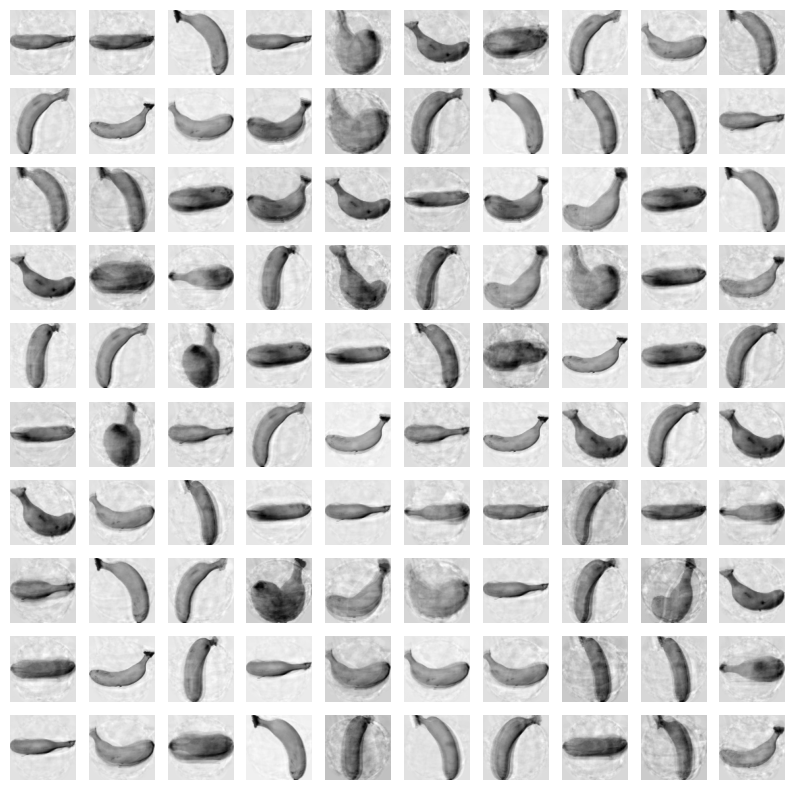

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

주성분을 최대로 사용하면( 그니까 특성이 10000개인데, 주성분도 10000개로 하거나 했다면 )

되돌렸을 때, 거의 완벽하게 원본 데이터를 재구성할 수 있음

그런데 이렇게하는 경우, 딱히 차원축소된건 아니라서 하는 의미가 없음

(애초에 주성분으로 만드는게 차원축소가 목적인데...)

## 설명된 분산 (explained variance)

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA클래스의 explained_variance_ratio_에 각 주성분의 분산 비율이 기록되어 있음

이 분산 비율을

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9214240695015496


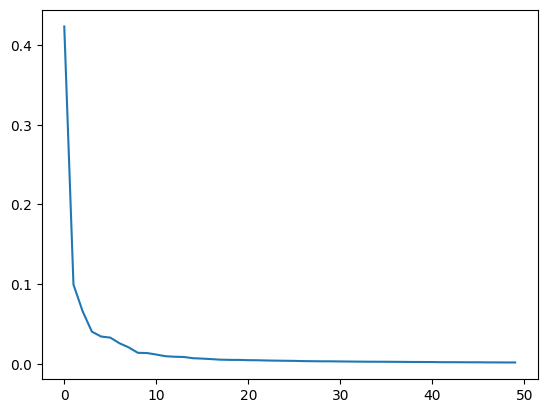

In [ ]:
plt.plot(pca.explained_variance_ratio_)

 처음 10개의 주성분이 대부분의 분산을 표현하고 있음


## 다른 알고리즘과 함께 사용하기

### 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도학습에 적용하고 차이를 찾아내자

3개의 과일사진을 분류해야하므로 로지스틱 회귀 모델을 사용해봄

지도학습 모듈이므로 타깃값을 설정

사과 = 0, 파인애플 = 1, 바나나 = 2

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

원본 데이터인 fruits_2d 사용

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9154859066009522


PCA로 축소한 fruits_pca 사용

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.033006906509399414


PCA로 훈련 데이터의 차원을 축소하면 저장공간 뿐만 아니라 머신러닝 모델의 훈련속도도 높일 수 있음



주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

설명된 분산의 50%에 달하는 주성분을 찾아보자

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


분산의 50%에 달하는 주성분은 2정도에서 달성된다.

0.5229877245800599


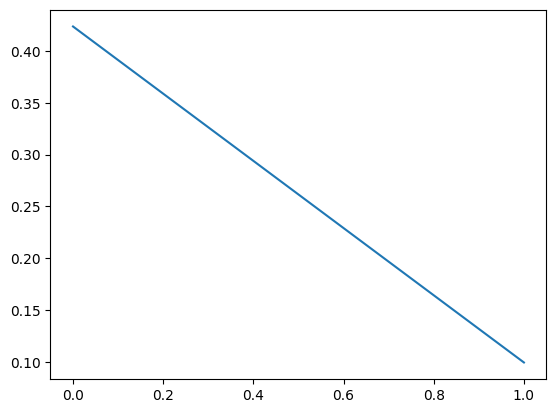

In [ ]:

print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

### 실제로 2로 해보기

원본 데이터 변환

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.022986650466918945


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

주성분 2개 만으로도 99의 정확도를 달성함

차원축소 데이터를 사용하여 k평균 알고리즘으로 클러스터를 사용해보자

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


6-2절에서 원본 데이터를 사용했을 때와 거의 비슷한 결과임

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

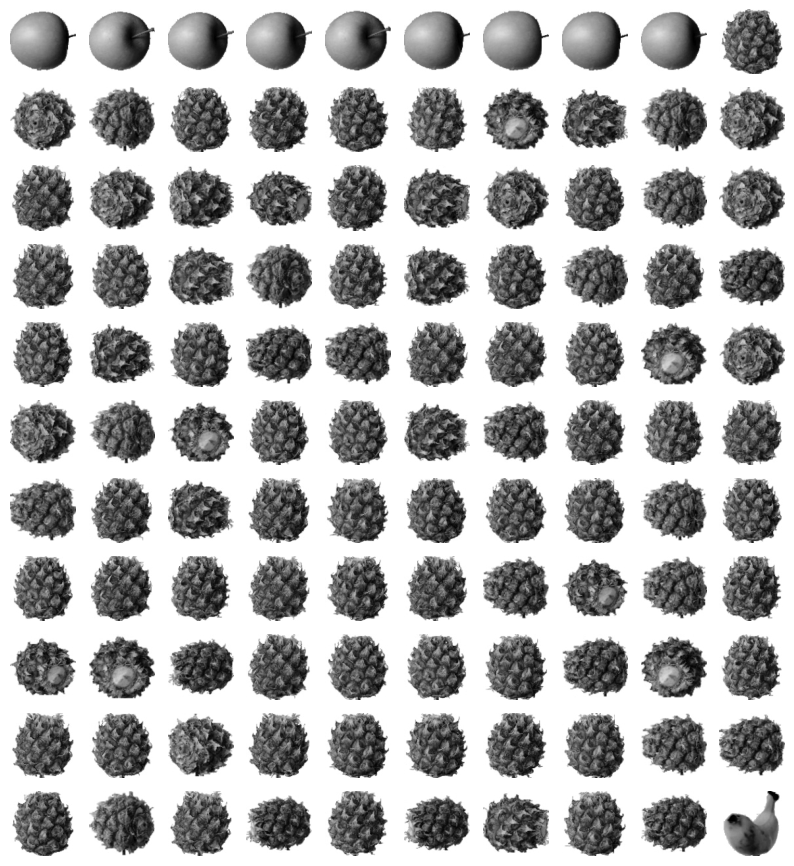

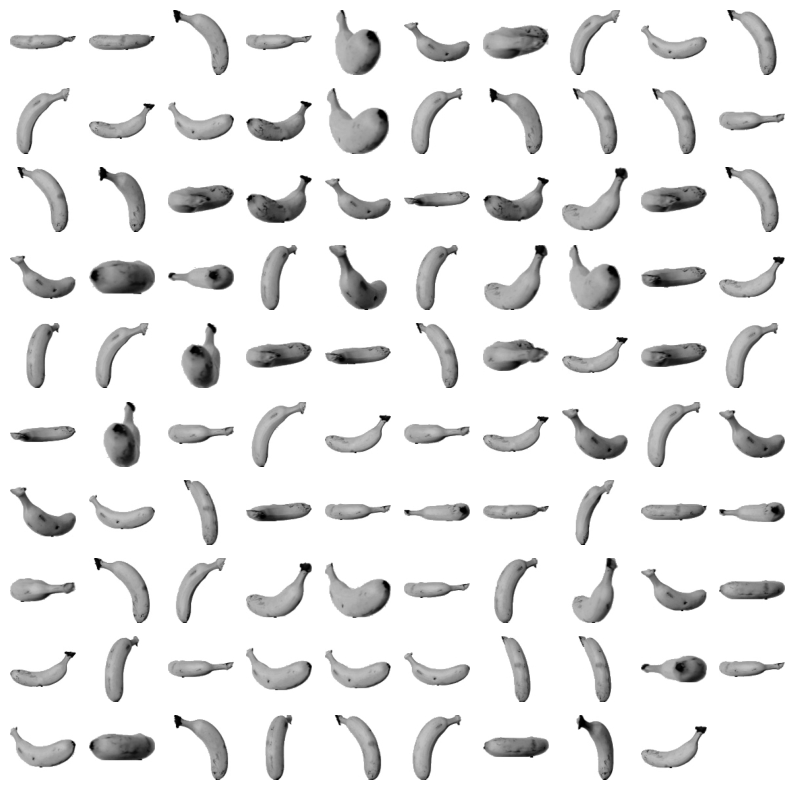

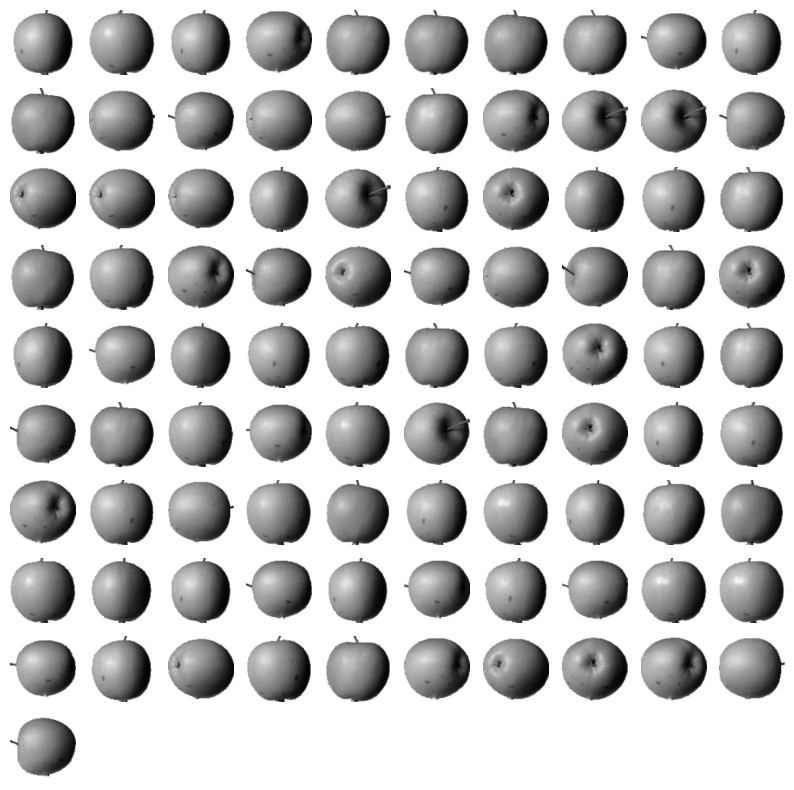

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

훈련 데이터의 차원 축소의 장점 중 하나는 시각화

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

km.labels_를 사용하여 화면에 시각화 할 수 있음

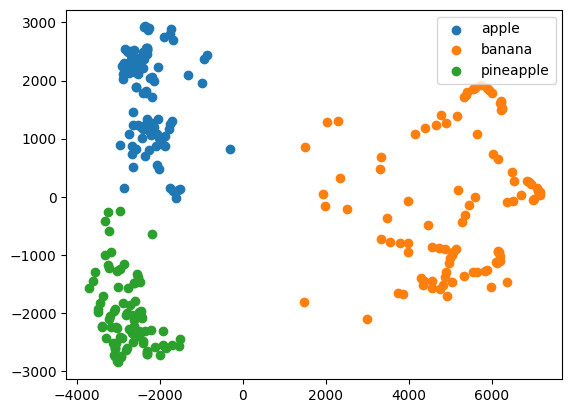

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

 파인애플 클러스터의 경계와 가까운 샘플이 틀림

 데이터를 시각화 하면 예상치 못한 통찰을 얻을 수 이음

------------

차원 축소의 장점

1. 과대적합 억제
2. 저장공간확보
3. 모델 처리속도 상승
4. 모델성능상승
5. 시각화 가능

In [ ]:
range

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 잘 구분됨